American Sign Language Interpreter

loading necessary libraries


In [17]:
import os
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix, classification_report

loading image data sets


In [18]:
train_dir = "asl_alphabet_train"
test_dir = "asl_alphabet_test"

img_height, img_width = 64, 64 # setting specific image size
batch_size = 32 # setting batch size

Preprocessing image dataset

In [19]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(  # this is spliting training data for us from the directory
    train_dir,
    validation_split=0.2,
    subset="training",
    seed=100,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(  # this is spliting validation data for us from the directory
    train_dir,
    validation_split=0.2,
    subset="validation",
    seed=100,
    image_size=(img_height, img_width),
    batch_size=batch_size
)
classnames = train_ds.class_names

Found 87000 files belonging to 29 classes.
Using 69600 files for training.
Found 87000 files belonging to 29 classes.
Using 17400 files for validation.


Creating our neural network using different layers

In [20]:
model = Sequential([
    
    Input(shape=(64, 64, 3)),

    Conv2D(64,(3,3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    GlobalAveragePooling2D(),
    
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(29, activation='softmax')  
])

compiling our neural network model and initiating training process

In [21]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

model.compile( # compiling the model
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit( # begins training
    train_ds, 
    validation_data=val_ds,
    epochs=10,
    callbacks=[early_stop]
)

Epoch 1/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 137s 62ms/step - accuracy: 0.3304 - loss: 2.4958 - val_accuracy: 0.8985 - val_loss: 0.3434
Epoch 2/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 134s 62ms/step - accuracy: 0.8707 - loss: 0.3831 - val_accuracy: 0.9675 - val_loss: 0.0961
Epoch 3/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 133s 61ms/step - accuracy: 0.9403 - loss: 0.1783 - val_accuracy: 0.9920 - val_loss: 0.0265
Epoch 4/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 140s 64ms/step - accuracy: 0.9653 - loss: 0.1040 - val_accuracy: 0.9890 - val_loss: 0.0348
Epoch 5/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 146s 67ms/step - accuracy: 0.9701 - loss: 0.0976 - val_accuracy: 0.9947 - val_loss: 0.0162
Epoch 6/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 147s 68ms/step - accuracy: 0.9755 - loss: 0.0779 - val_accuracy: 0.9982 - val_loss: 0.0072
Epoch 7/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 150s 69ms/step - accuracy: 0.9808 - loss: 0.0603 - val_accuracy: 0.9907 - val_loss: 0.0275
Epoch 8/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 146s 67ms/step - accuracy: 

saving the model

In [22]:
# model.save("asl_model.keras")

plotting the relation between the train accuracy and validation accuracy plus the loses

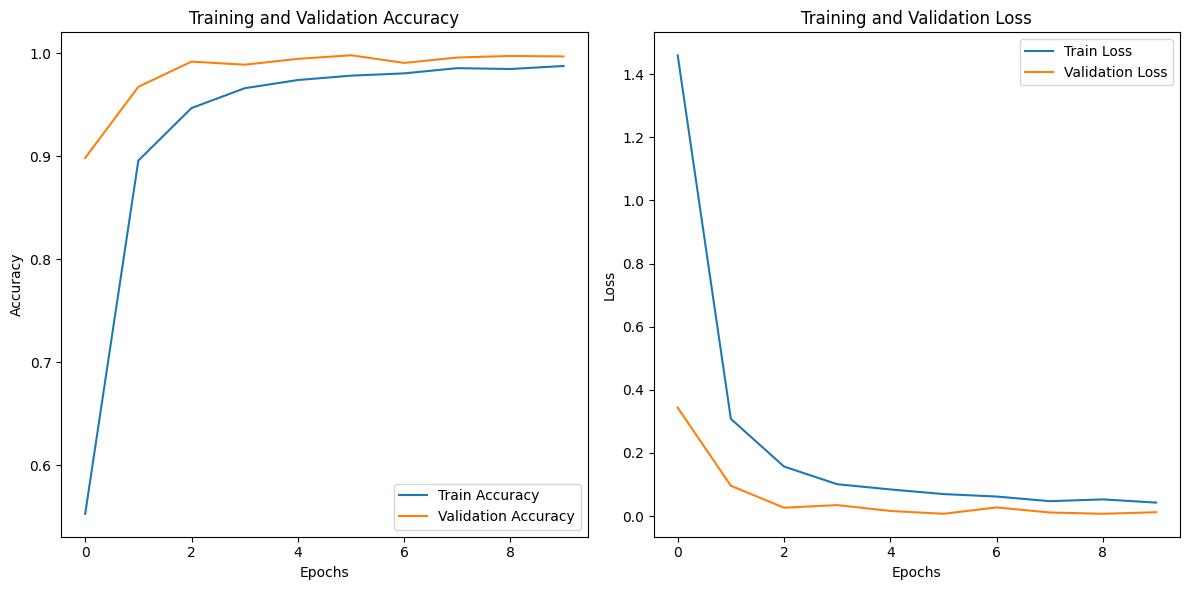

In [23]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Testing Model on New Image Data

In [33]:
img_height, img_width = 64, 64
batch_size = 32 

test_images = []
test_filenames = os.listdir(test_dir)  

for img_filename in test_filenames:
    img_path = os.path.join(test_dir, img_filename)
    
    if os.path.isfile(img_path):  
        img = image.load_img(img_path, target_size=(img_height, img_width))
        img_array = image.img_to_array(img)  
        img_array = np.expand_dims(img_array, axis=0)
        test_images.append(img_array)

test_images = np.vstack(test_images)  
predictions = model.predict(test_images)

predicted_classes = np.argmax(predictions, axis=1)
for i, pred in enumerate(predicted_classes):
    class_name = classnames[pred]
    print(f"This image  {test_filenames[i]} shows  a sign for : {class_name}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
This image  A_test.jpg shows  a sign for : A
This image  B_test.jpg shows  a sign for : B
This image  C_test.jpg shows  a sign for : C
This image  D_test.jpg shows  a sign for : D
This image  E_test.jpg shows  a sign for : E
This image  F_test.jpg shows  a sign for : F
This image  G_test.jpg shows  a sign for : G
This image  H_test.jpg shows  a sign for : H
This image  I_test.jpg shows  a sign for : I
This image  J_test.jpg shows  a sign for : J
This image  K_test.jpg shows  a sign for : K
This image  L_test.jpg shows  a sign for : L
This image  M_test.jpg shows  a sign for : M
This image  nothing_test.jpg shows  a sign for : nothing
This image  N_test.jpg shows  a sign for : N
This image  O_test.jpg shows  a sign for : O
This image  P_test.jpg shows  a sign for : P
This image  Q_test.jpg shows  a sign for : Q
This image  R_test.jpg shows  a sign for : R
This image  space_test.jpg shows  a sign for : space
This image  S_test.jpg shows  a sign for :

Using OpenCv for live translation of Sign Language 

In [34]:

import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model


img_height, img_width = 64, 64

saved_model = load_model("asl_model.keras")

cap = cv2.VideoCapture(0) # opening the camera

while True:
    ret, frame = cap.read()
    if not ret:
        break
    frame = cv2.flip(frame, 1)
    x1, y1, x2, y2 = 100, 100, 300, 300
    roi = frame[y1:y2, x1:x2]
    cv2.rectangle(frame, (x1, y1), (x2, y2), (255, 0, 0), 2)

    img = cv2.resize(roi, (img_height, img_width))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)  

    predictions = saved_model.predict(img)
    predicted_class = np.argmax(predictions[0])
    label = classnames[predicted_class]

    cv2.putText(frame, f"Prediction: {label}", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

    cv2.imshow("Sign Language Detector", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━